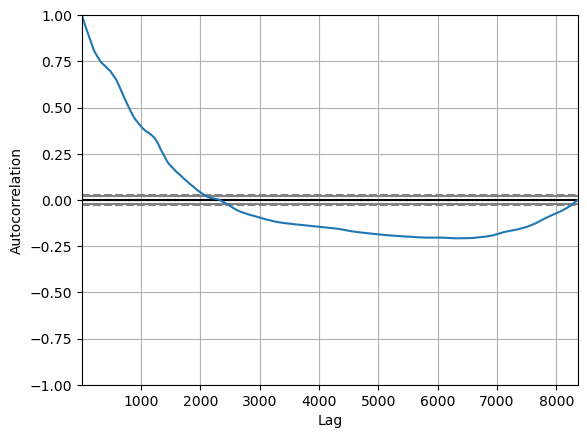

In [1]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


 
series = read_csv("archive/Stocks/aapl.us.txt", header=0, parse_dates=[0], index_col=0).squeeze("columns")
series = series['Close']
autocorrelation_plot(series)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8364
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8290.170
Date:                Thu, 27 Apr 2023   AIC                          16592.340
Time:                        19:11:50   BIC                          16634.529
Sample:                    09-30-1984   HQIC                         16606.749
                         - 11-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0302      0.004      7.083      0.000       0.022       0.039
ar.L2         -0.0193      0.005     -3.886      0.000      -0.029      -0.010
ar.L3         -0.0290      0.004     -6.549      0.0

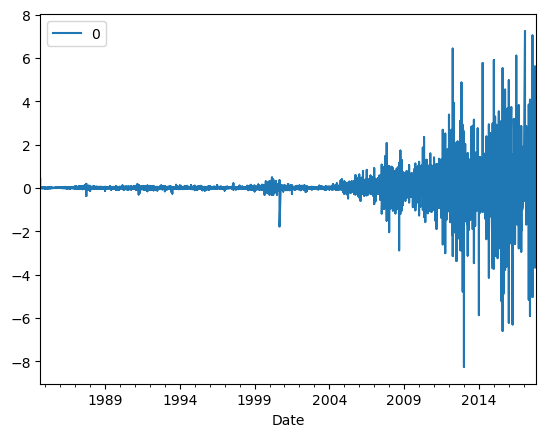

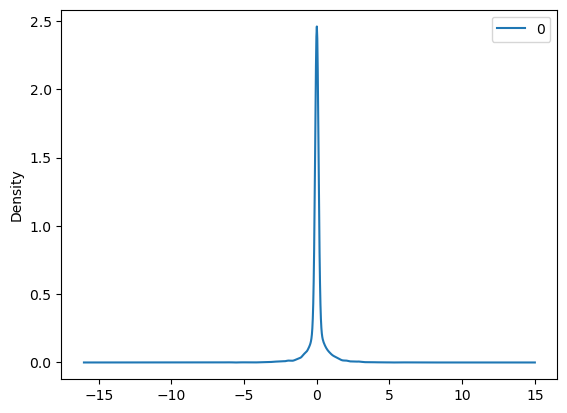

                 0
count  8364.000000
mean      0.020424
std       0.651738
min      -8.264476
25%      -0.033816
50%       0.000965
75%       0.044772
max       7.245223


In [2]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
series = read_csv("archive/Stocks/aapl.us.txt", header=0, parse_dates=[0], index_col=0).squeeze("columns")
series = series['Close']
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [3]:
#Inspiration for this piece taken from: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
series = read_csv("archive/Stocks/aapl.us.txt", header=0, parse_dates=[0], index_col=0).squeeze("columns")
series = series['Close']
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))


predicted=88.522875, expected=88.103000
predicted=88.109809, expected=88.837000
predicted=88.730994, expected=91.151000
predicted=91.322853, expected=91.002000
predicted=90.912670, expected=91.601000
predicted=91.620203, expected=92.869000
predicted=93.028619, expected=92.267000
predicted=92.177079, expected=92.052000
predicted=92.066152, expected=89.661000
predicted=89.685068, expected=90.158000
predicted=90.122443, expected=89.652000
predicted=89.690659, expected=89.210000
predicted=89.049703, expected=89.059000
predicted=89.148342, expected=89.050000
predicted=89.018449, expected=89.295000
predicted=89.286912, expected=90.474000
predicted=90.499388, expected=90.456000
predicted=90.447986, expected=91.653000
predicted=91.669899, expected=91.898000
predicted=91.966585, expected=92.349000
predicted=92.307636, expected=93.462000
predicted=93.554789, expected=94.762000
predicted=94.772578, expected=94.798000
predicted=94.797165, expected=94.806000
predicted=94.840856, expected=95.492000


predicted=122.233561, expected=119.570000
predicted=119.344397, expected=118.800000
predicted=119.202557, expected=119.550000
predicted=119.471231, expected=121.790000
predicted=121.657704, expected=120.540000
predicted=120.476761, expected=120.120000
predicted=120.189513, expected=120.260000
predicted=120.417334, expected=123.070000
predicted=122.975572, expected=122.890000
predicted=122.811866, expected=124.230000
predicted=124.240941, expected=124.110000
predicted=124.266212, expected=124.100000
predicted=123.985361, expected=125.410000
predicted=125.534760, expected=126.490000
predicted=126.431094, expected=123.720000
predicted=123.622077, expected=126.010000
predicted=126.197106, expected=125.750000
predicted=125.758085, expected=124.310000
predicted=124.047958, expected=124.570000
predicted=124.856483, expected=124.000000
predicted=123.915175, expected=124.160000
predicted=124.086722, expected=123.470000
predicted=123.520627, expected=122.770000
predicted=122.731744, expected=121

predicted=90.984770, expected=93.545000
predicted=93.534174, expected=94.979000
predicted=94.903464, expected=93.177000
predicted=93.094605, expected=92.965000
predicted=93.026016, expected=93.778000
predicted=93.781834, expected=91.659000
predicted=91.572547, expected=93.022000
predicted=93.115778, expected=93.660000
predicted=93.673163, expected=93.808000
predicted=93.707023, expected=93.594000
predicted=93.653473, expected=97.309000
predicted=97.273511, expected=97.522000
predicted=97.387324, expected=98.260000
predicted=98.171800, expected=99.730000
predicted=99.767989, expected=98.607000
predicted=98.444396, expected=97.797000
predicted=97.813390, expected=97.885000
predicted=97.929712, expected=97.935000
predicted=97.885306, expected=98.984000
predicted=99.000497, expected=99.233000
predicted=99.223212, expected=101.240000
predicted=101.208228, expected=102.570000
predicted=102.515667, expected=102.410000
predicted=102.305823, expected=102.530000
predicted=102.533386, expected=10

predicted=109.767336, expected=109.700000
predicted=109.686457, expected=108.770000
predicted=108.772072, expected=107.760000
predicted=107.750024, expected=108.160000
predicted=108.220295, expected=107.380000
predicted=107.375594, expected=108.210000
predicted=108.255649, expected=109.280000
predicted=109.325389, expected=110.350000
predicted=110.316426, expected=112.150000
predicted=112.161243, expected=111.510000
predicted=111.410562, expected=113.360000
predicted=113.354720, expected=113.360000
predicted=113.313654, expected=113.990000
predicted=113.920133, expected=114.140000
predicted=114.149426, expected=114.800000
predicted=114.756482, expected=115.110000
predicted=115.101198, expected=115.210000
predicted=115.177290, expected=114.450000
predicted=114.422897, expected=114.680000
predicted=114.686686, expected=115.410000
predicted=115.432059, expected=114.920000
predicted=114.882173, expected=114.890000
predicted=114.901439, expected=113.990000
predicted=113.979617, expected=114

predicted=157.988483, expected=160.920000
predicted=161.030255, expected=160.280000
predicted=160.265060, expected=159.080000
predicted=158.944744, expected=157.710000
predicted=157.769855, expected=159.310000
predicted=159.405214, expected=158.100000
predicted=158.053034, expected=158.160000
predicted=158.109275, expected=155.510000
predicted=155.529659, expected=152.840000
predicted=152.833655, expected=151.350000
predicted=151.444539, expected=150.010000
predicted=150.026651, expected=152.590000
predicted=152.637760, expected=153.680000
predicted=153.641362, expected=152.730000
predicted=152.578290, expected=153.570000
predicted=153.616675, expected=153.260000
predicted=153.299504, expected=153.920000
predicted=153.904565, expected=152.930000
predicted=152.916573, expected=154.830000
predicted=154.864639, expected=154.740000
predicted=154.738521, expected=155.280000
predicted=155.220841, expected=155.340000
predicted=155.364381, expected=155.990000
predicted=155.993833, expected=155

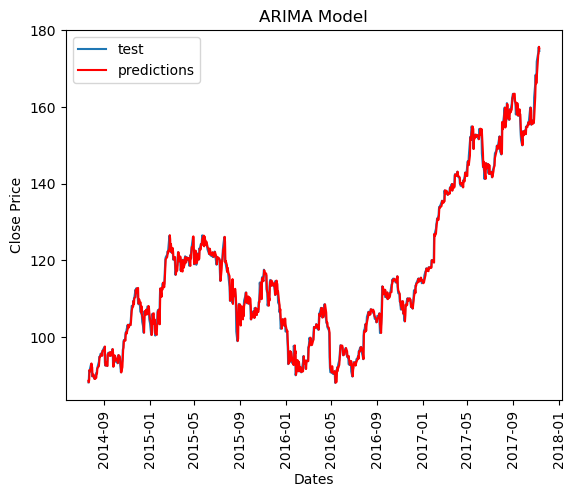

MSE: 2.6585130632891865
MAE: 1.1715808390862195
RMSE: 1.630494729610981


In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot
from pandas import read_csv
import pandas as pd

series = read_csv("archive/Stocks/aapl.us.txt")
#series = series['Date']
series['Date'] = pd.to_datetime(series['Date'])
dates = series['Date'][size:len(X)]



# plot forecasts against actual outcomes
pyplot.plot(dates, test, label='test')
pyplot.plot(dates, predictions, color='red', label = 'predictions')
pyplot.legend(loc="upper left")
pyplot.setp(pyplot.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
pyplot.xlabel("Dates")
pyplot.ylabel("Close Price")
pyplot.title("ARIMA Model")

pyplot.show()



# evaluate forecasts
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')